In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import Data
import os
from configparser import ConfigParser
from baseline import Baseline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
#cat = [0, 1]
cat = [[0],[1]]
enc = OneHotEncoder()
enc.fit(cat)
enc.categories_


[array([0, 1])]

In [4]:
# original data
X = np.array([[0,1,1,0,0,0,0,1],
     [0,0,0,0,0,0,0,1],
     [0,1,1,0,1,0,0,1],
     [0,0,1,0,0,0,0,0],
     [0,1,1,0,0,0,1,1],
     [0,0,0,0,0,0,0,0]])

Y = [[0, 1, 1],
     [0, 0, 0],
     [1, 0, 1],
     [0, 0, 1],
     [0, 0, 1],
     [0, 0, 0]]

X_ = np.array([[0,1,1,0,0,0,0,1],
     [0,0,0,1,0,0,0,1],
     [0,1,0,0,1,0,0,1]])
Y_ = np.array([[0, 1, 1],
     [0, 0, 1],
     [1, 0, 0]])

In [37]:
a = [1,2,3]
for t in a:
    print([t])

[1]
[2]
[3]


In [29]:
def one_hot_enc(seq):
    enc_res = list()
    print(seq)
    cat = [[0],[1]]
    enc = OneHotEncoder()
    enc.fit(cat)
    for b in seq:
        #seq_res = list()
        for x in b:
            tmp = enc.transform(x.reshape(1,-1)).toarray()
            tmp = tmp.flatten()
            enc_res.append(tmp)
        #enc_res.append(seq_res)
        
    return np.array(enc_res).reshape(seq.shape[0],seq.shape[1], -1)

In [30]:
def one_hot_enc_inv_transform(seq):
    enc_res = list()
    print(seq)
    cat = [[0],[1]]
    enc = OneHotEncoder()
    enc.fit(cat)
    for b in seq:
        #for x in b:
            #print(x)
        tmp = enc.inverse_transform(b)
            #tmp = tmp.flatten()
        enc_res.append(tmp)
        #enc_res.append(seq_res)
        
    return np.array(enc_res).reshape(seq.shape[0],-1)

In [31]:
#for seq in X:
#    print(one_hot_enc(seq))
res = one_hot_enc(X)
#print(res)
print(one_hot_enc_inv_transform(res))

[[0 1 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 1 1 0 1 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 1 1 0 0 0 1 1]
 [0 0 0 0 0 0 0 0]]
[[[1. 0.]
  [0. 1.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]
  [0. 1.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]]
[[0 1 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 1 1 0 1 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 1 1 0 0 0 1 1]
 [0 0 0 0 0 0 0 0]]


In [58]:
neigh = KNeighborsClassifier(n_neighbors=1, metric='matching', n_jobs=-1)
neigh.fit(X, Y)

In [28]:
enc = OneHotEncoder(categories=[[0,1]]*8)
#X_ = enc.fit_transform(X_).toarray()    
print(X)

[array([[1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.]]), array([[1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.]]), array([[1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.]]), array([[1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.]]), array([[1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.]]), array([[1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.]])]


In [74]:
neigh = KNeighborsClassifier(n_neighbors=1, metric='matching', n_jobs=-1)
neigh.fit(X, Y)

KNeighborsClassifier(metric='matching', n_jobs=-1, n_neighbors=1)

In [86]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
clf.fit(X, Y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [87]:
#pred = neigh.predict(X_)
pred = clf.predict(X_)
a = accuracy_score(Y_.ravel(), pred.ravel())
acc = balanced_accuracy_score(Y_.ravel(), pred.ravel())
f1 = f1_score(Y_.ravel(), pred.ravel())
print(pred)
print(a, acc, f1)

[[0 1 1]
 [0 0 0]
 [0 0 1]]
0.6666666666666666 0.65 0.5714285714285715


In [2]:
knn_cm = list()
rf_cm = list()

In [18]:
data_obj = Data()
config = ConfigParser()
config.read('config.ini')

df = data_obj.read_tsv()
baseline_approach = Baseline()
algo = config['train']['algo']

X_train, Y_train, X_test, Y_test = data_obj.split_train_test(df, 0, aggregate=True)

if algo == 'knn':
    acc, f1, cm = baseline_approach.nearest_neighbour(X_train, Y_train, X_test, Y_test, aggregate=True)
    knn_cm.append(cm)
elif algo == 'rf':
    acc, f1, cm = baseline_approach.random_forest(X_train, Y_train, X_test, Y_test, aggregate=True)
    rf_cm.append(cm)
print(len(knn_cm), len(rf_cm))

Min:  2020-05-26 15:15:00
Max:  2020-07-21 06:00:00
7 7


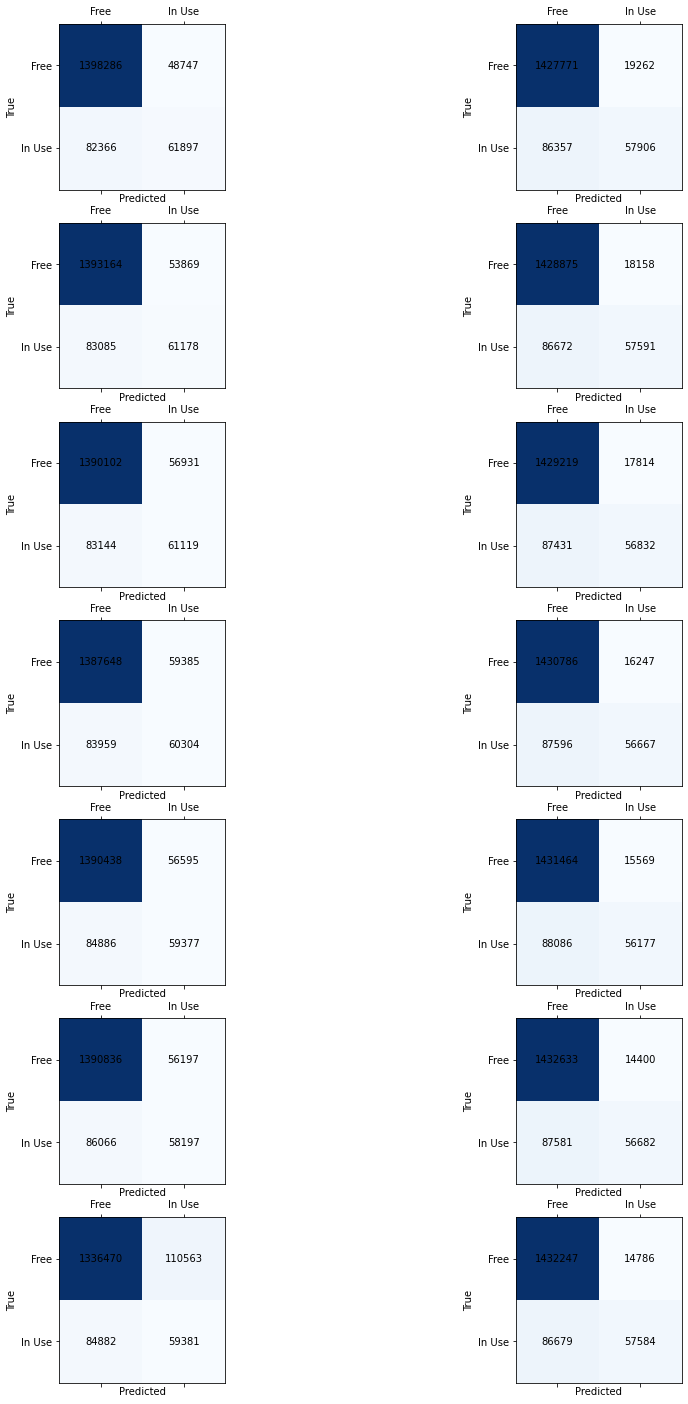

In [26]:
labels = ['Free', 'In Use']

fig, ax = plt.subplots(7,2, figsize=(15,25))

for r in range(7):
    for c in range(2):
        
        if c==0:
            cm_ = knn_cm[r]
        else:
            cm_ = rf_cm[r]
        
        ax[r,c].matshow(cm_, cmap=plt.cm.Blues)

        for i in range(len(cm_)):
            for j in range(len(cm_[0])):
                count = cm_[j,i]
                ax[r,c].text(i, j, str(count), va='center', ha='center')

        ax[r,c].set_xticklabels([''] + labels)
        ax[r,c].set_yticklabels([''] + labels)
        ax[r,c].set_xlabel('Predicted')
        ax[r,c].set_ylabel('True')
plt.show()

In [89]:
knn_result = pd.read_csv('result/knn.csv')
rf_result = pd.read_csv('result/rf.csv')
knn_result

,Data,Input_Horizon,Output_Horizon,train_step_size,test_step_size,n_train,n_test,balanced_acurracy,f1_score
0,Complete,1,1,96,96,47360,16576,0.697685,0.485644
1,Individual,1,1,96,96,40,14,0.612710,0.132308
2,Complete,2,1,96,96,46176,16576,0.693423,0.471852
3,Individual,2,1,96,96,39,14,0.607018,0.128318
4,Complete,3,1,96,96,44992,16576,0.692160,0.466001
5,Individual,3,1,96,96,38,14,0.605435,0.122774
6,Complete,4,1,96,96,43808,16576,0.688488,0.456932
7,Individual,4,1,96,96,37,14,0.604039,0.122862
8,Complete,5,1,96,96,42624,16576,0.686239,0.456334
9,Individual,5,1,96,96,36,14,0.605874,0.124123


In [91]:
knn_complete = knn_result[knn_result['Data'] == 'Complete']
#knn_individual = knn_result[knn_result['Data'] == 'Individual']
rf_complete = rf_result[rf_result['Data'] == 'Complete']
#rf_individual = rf_result[rf_result['Data'] == 'Individual']

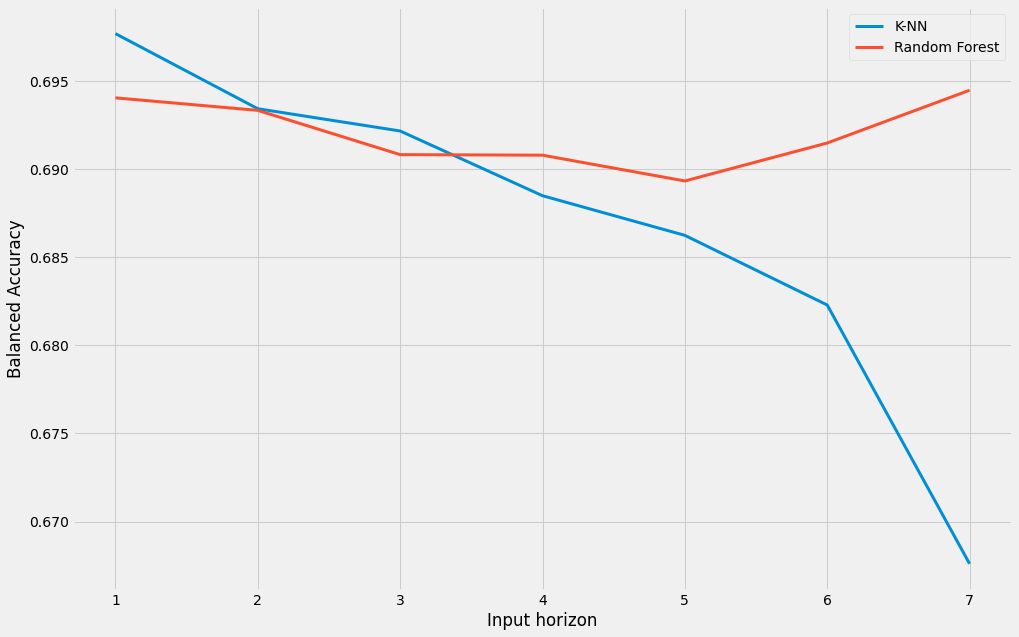

In [100]:
plt.style.use('fivethirtyeight')
#x_labels = [t.strftime("%H:%M") for t in daily_df.columns.values]
x_labels = knn_complete.Input_Horizon.values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.set_ylabel('Balanced Accuracy')
ax.set_xlabel('Input horizon')

plt.plot(x_labels, knn_complete.balanced_acurracy.values, linewidth=3, label='K-NN')
plt.plot(x_labels, rf_complete.balanced_acurracy.values, linewidth=3, label='Random Forest')

plt.legend()
plt.show()

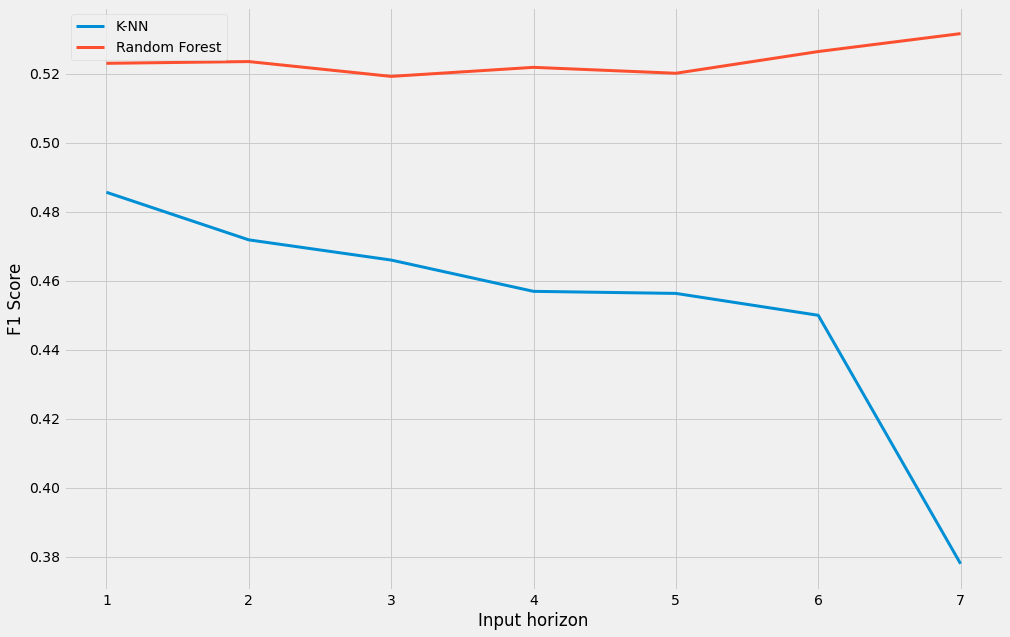

In [101]:
plt.style.use('fivethirtyeight')
#x_labels = [t.strftime("%H:%M") for t in daily_df.columns.values]
x_labels = knn_complete.Input_Horizon.values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.set_ylabel('F1 Score')
ax.set_xlabel('Input horizon')

plt.plot(x_labels, knn_complete.f1_score.values, linewidth=3, label='K-NN')
plt.plot(x_labels, rf_complete.f1_score.values, linewidth=3, label='Random Forest')

plt.legend()
plt.show()